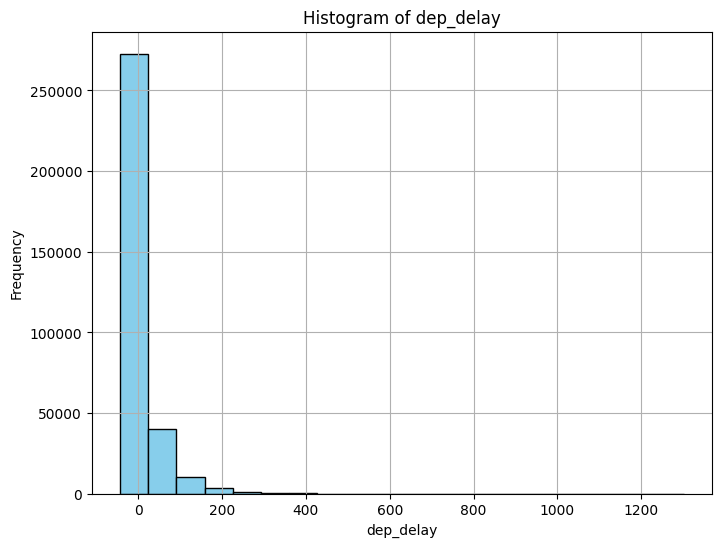

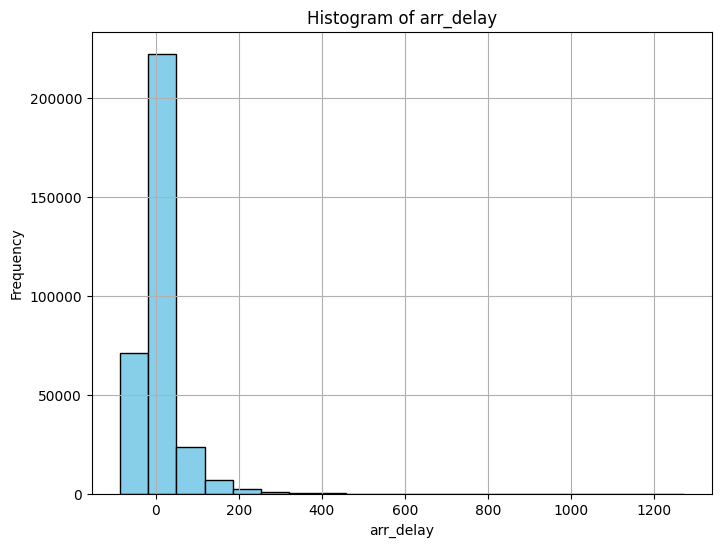

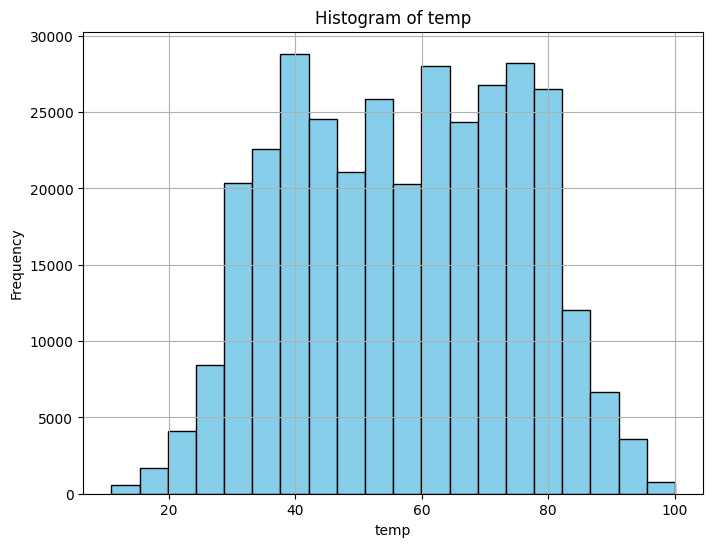

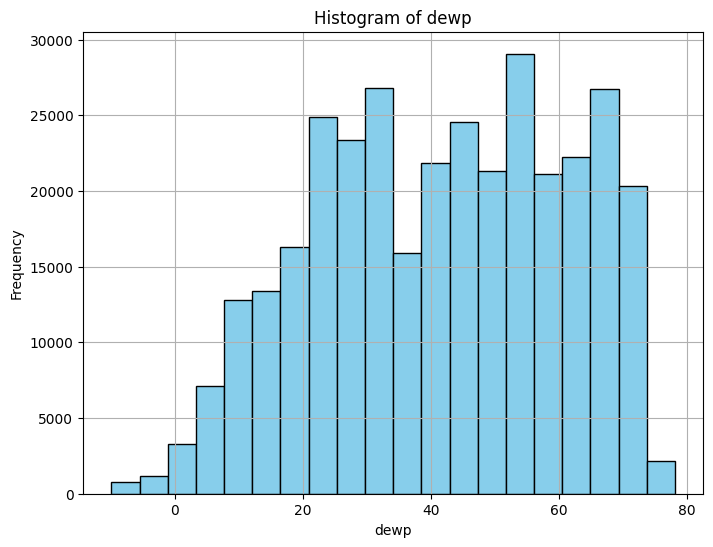

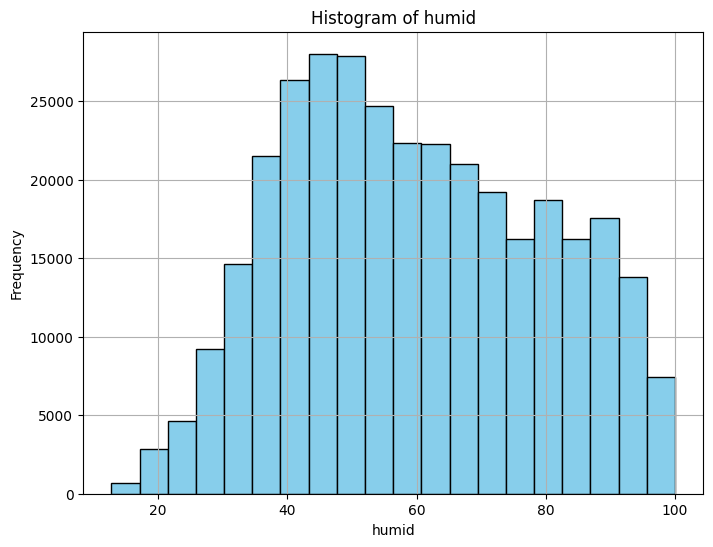

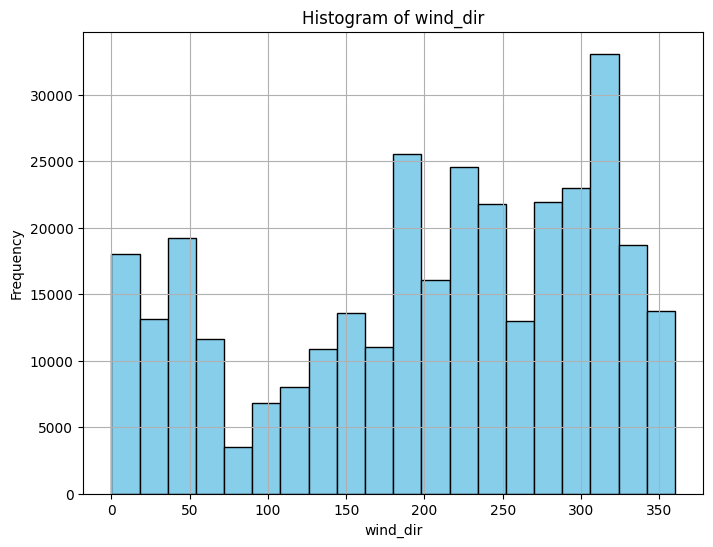

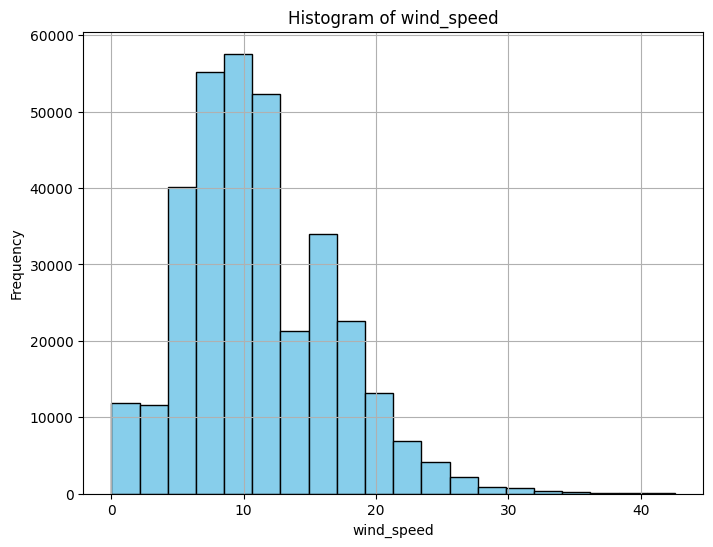

Continuous Data Quality Report:
               Feature  Minimum  1st Quartile        Mean     Median  \
dep_delay    dep_delay   -43.00      -5.00000   12.639070   -2.00000   
arr_delay    arr_delay   -86.00     -17.00000    6.895377   -5.00000   
temp              temp    10.94      42.08000   56.996473   57.20000   
dewp              dewp    -9.94      26.06000   41.630886   42.80000   
humid            humid    12.74      43.99000   59.557390   57.73000   
wind_dir      wind_dir     0.00     130.00000  201.539911  220.00000   
wind_speed  wind_speed     0.00       6.90468   11.114294   10.35702   

            3rd Quartile     Maximum  Standard Deviation  Total Instances  \
dep_delay       11.00000  1301.00000           40.210061           336776   
arr_delay       14.00000  1272.00000           44.633292           336776   
temp            71.96000   100.04000           17.964952           336776   
dewp            57.92000    78.08000           19.352888           336776   
humid 

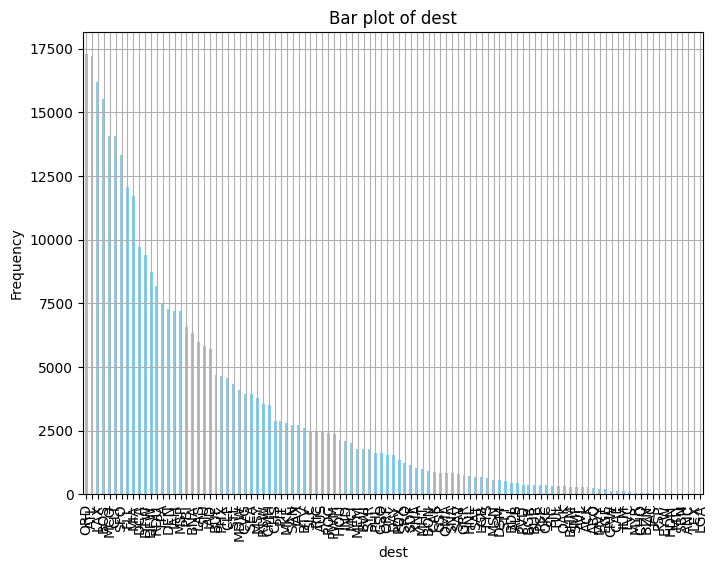

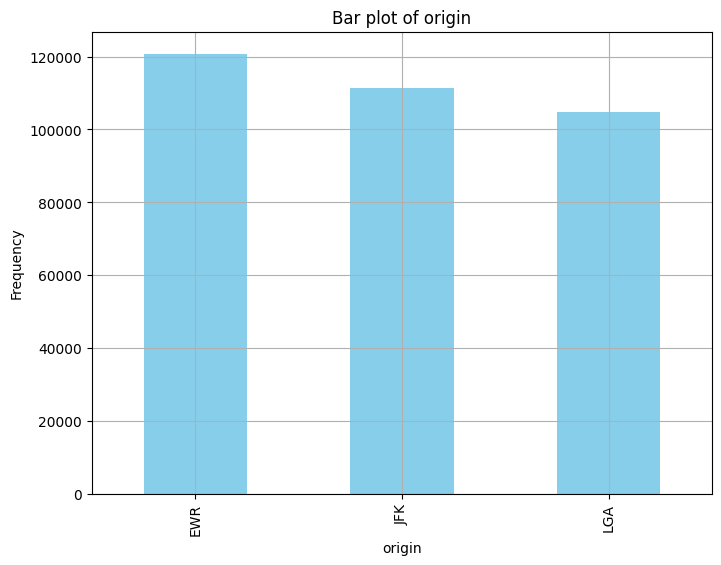

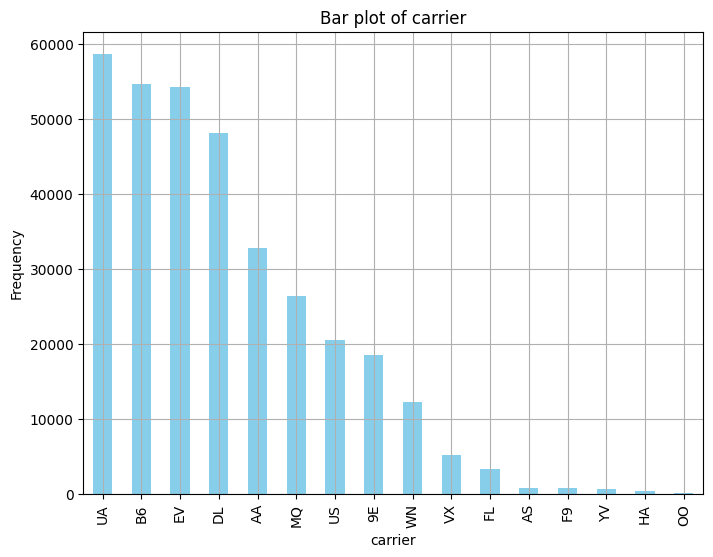

C:\Users\Timoy\AppData\Local\Temp\ipykernel_23988\620282852.py:78: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Mode Frequency': mode_counts.apply(lambda x: x[0] if len(x) > 0 else None),
C:\Users\Timoy\AppData\Local\Temp\ipykernel_23988\620282852.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  '2nd Mode Frequency': mode_counts.apply(lambda x: x[1] if len(x) > 1 else None),
C:\Users\Timoy\AppData\Local\Temp\ipykernel_23988\620282852.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

ValueError: array length 1 does not match index length 4

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Analytic Base Table (ABT) into a DataFrame
abt_df = pd.read_csv('ABT_csv')

# Continuous Features
continuous_features = ['dep_delay', 'arr_delay', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed']

# Calculate descriptive statistics for continuous features
continuous_stats = abt_df[continuous_features].describe().transpose()

# Calculate count of missing values for each continuous feature
missing_values_count = abt_df[continuous_features].isnull().sum()

# Calculate proportion of missing values for each continuous feature
missing_values_percentage = (missing_values_count / len(abt_df)) * 100

# Calculate cardinality for each continuous feature
cardinality = abt_df[continuous_features].nunique()

# Plot histograms for continuous features
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    plt.hist(abt_df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Create DataFrame for continuous features
continuous_data_quality_report = pd.DataFrame({
    'Feature': continuous_stats.index,
    'Minimum': continuous_stats['min'],
    '1st Quartile': continuous_stats['25%'],
    'Mean': continuous_stats['mean'],
    'Median': continuous_stats['50%'],
    '3rd Quartile': continuous_stats['75%'],
    'Maximum': continuous_stats['max'],
    'Standard Deviation': continuous_stats['std'],
    'Total Instances': len(abt_df),
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Cardinality': cardinality
})

print("Continuous Data Quality Report:")
print(continuous_data_quality_report)

# Categorical Features
categorical_features = ['dest', 'origin', 'carrier']

# Calculate mode and 2nd mode for each categorical feature
mode_values = abt_df[categorical_features].mode()
mode_counts = abt_df[categorical_features].apply(lambda x: x.value_counts().nlargest(2))

# Calculate percentage of missing values for each categorical feature
missing_values_percentage_cat = (abt_df[categorical_features].isnull().sum() / len(abt_df)) * 100

# Calculate cardinality for each categorical feature
cardinality_cat = abt_df[categorical_features].nunique()

# Plot bar plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    abt_df[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Create DataFrame for categorical features
categorical_data_quality_report = pd.DataFrame({
    'Feature': mode_values.index,
    'Mode': mode_values.iloc[:, 0],
    'Mode Frequency': mode_counts.apply(lambda x: x[0] if len(x) > 0 else None),
    '2nd Mode': mode_values.apply(lambda x: x[1] if len(x) > 1 else None),
    '2nd Mode Frequency': mode_counts.apply(lambda x: x[1] if len(x) > 1 else None),
    'Missing Values Percentage': missing_values_percentage_cat[mode_values.index],
    'Cardinality': cardinality_cat[mode_values.index]
}).reset_index(drop=True)

print("\nCategorical Data Quality Report:")
print(categorical_data_quality_report)


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Analytic Base Table (ABT) into a DataFrame
abt_df = pd.read_csv('ABT_csv')

# Categorical Features
categorical_features = ['dest', 'origin', 'carrier']

for feature in categorical_features:
    # Calculate mode for the feature
    mode_value = abt_df[feature].mode()[0]
    
    # Calculate frequency of mode value
    mode_frequency = abt_df[feature].value_counts().max()
    
    # Calculate mode percentage
    mode_percentage = (mode_frequency / len(abt_df)) * 100
    
    # Calculate second mode value and frequency
    second_mode_value = abt_df[feature].value_counts().index[1] if len(abt_df[feature].value_counts()) > 1 else None
    second_mode_frequency = abt_df[feature].value_counts().iloc[1] if len(abt_df[feature].value_counts()) > 1 else None
    
    # Calculate second mode percentage
    second_mode_percentage = (second_mode_frequency / len(abt_df)) * 100 if second_mode_frequency else None
    
    # Calculate percentage of missing values
    missing_values_percentage = (abt_df[feature].isnull().sum() / len(abt_df)) * 100
    
    # Calculate cardinality
    cardinality = abt_df[feature].nunique()
    
    # Calculate total count
    total_count = len(abt_df)
    
    print(f"\nCategorical Data Quality Report for {feature}:")
    print(f"Mode: {mode_value}")
    print(f"Mode Frequency: {mode_frequency}")
    print(f"Mode Percentage: {mode_percentage}%")
    print(f"Second Mode: {second_mode_value}")
    print(f"Second Mode Frequency: {second_mode_frequency}")
    print(f"Second Mode Percentage: {second_mode_percentage}%")
    print(f"Missing Values Percentage: {missing_values_percentage}%")
    print(f"Cardinality: {cardinality}")
    print(f"Total Count: {total_count}")



Categorical Data Quality Report for dest:
Mode: ORD
Mode Frequency: 17283
Mode Percentage: 5.131897759935387%
Second Mode: ATL
Second Mode Frequency: 17215
Second Mode Percentage: 5.111706297360858%
Missing Values Percentage: 0.0%
Cardinality: 105
Total Count: 336776

Categorical Data Quality Report for origin:
Mode: EWR
Mode Frequency: 120835
Mode Percentage: 35.879932061667105%
Second Mode: JFK
Second Mode Frequency: 111279
Second Mode Percentage: 33.042437703399294%
Missing Values Percentage: 0.0%
Cardinality: 3
Total Count: 336776

Categorical Data Quality Report for carrier:
Mode: UA
Mode Frequency: 58665
Mode Percentage: 17.419590469629664%
Second Mode: B6
Second Mode Frequency: 54635
Second Mode Percentage: 16.222949378815592%
Missing Values Percentage: 0.0%
Cardinality: 16
Total Count: 336776


In [28]:
import pandas as pd

abt_df = pd.read_csv('ABT_csv')

print(abt_df)

       dest origin carrier  dep_delay  arr_delay            time_hour   temp  \
0       IAH    EWR      UA        2.0       11.0  2013-01-01 05:00:00  39.02   
1       IAH    LGA      UA        4.0       20.0  2013-01-01 05:00:00  39.92   
2       MIA    JFK      AA        2.0       33.0  2013-01-01 05:00:00  39.02   
3       BQN    JFK      B6       -1.0      -18.0  2013-01-01 05:00:00  39.02   
4       ATL    LGA      DL       -6.0      -25.0  2013-01-01 06:00:00  39.92   
...     ...    ...     ...        ...        ...                  ...    ...   
336771  DCA    JFK      9E        NaN        NaN  2013-09-30 14:00:00  68.00   
336772  SYR    LGA      9E        NaN        NaN  2013-09-30 22:00:00  64.94   
336773  BNA    LGA      MQ        NaN        NaN  2013-09-30 12:00:00  69.08   
336774  CLE    LGA      MQ        NaN        NaN  2013-09-30 11:00:00  66.92   
336775  RDU    LGA      MQ        NaN        NaN  2013-09-30 08:00:00  60.98   

         dewp  humid  wind_dir  wind_sp

In [27]:
#ABT

import pandas as pd

flights_df = pd.read_csv('CasusEDA/csv/flights_csv')
weather_df = pd.read_csv('CasusEDA/csv/weather_csv')

flights_selected = flights_df[['dest', 'origin', 'carrier', 'dep_delay', 'arr_delay', 'time_hour']]
weather_selected = weather_df[['origin', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'time_hour']]

merged_df = flights_selected.merge(weather_selected, how='left', on=['time_hour', 'origin'])

print(merged_df)
merged_df.to_csv('ABT_csv', index=False)

       dest origin carrier  dep_delay  arr_delay            time_hour   temp  \
0       IAH    EWR      UA        2.0       11.0  2013-01-01 05:00:00  39.02   
1       IAH    LGA      UA        4.0       20.0  2013-01-01 05:00:00  39.92   
2       MIA    JFK      AA        2.0       33.0  2013-01-01 05:00:00  39.02   
3       BQN    JFK      B6       -1.0      -18.0  2013-01-01 05:00:00  39.02   
4       ATL    LGA      DL       -6.0      -25.0  2013-01-01 06:00:00  39.92   
...     ...    ...     ...        ...        ...                  ...    ...   
336771  DCA    JFK      9E        NaN        NaN  2013-09-30 14:00:00  68.00   
336772  SYR    LGA      9E        NaN        NaN  2013-09-30 22:00:00  64.94   
336773  BNA    LGA      MQ        NaN        NaN  2013-09-30 12:00:00  69.08   
336774  CLE    LGA      MQ        NaN        NaN  2013-09-30 11:00:00  66.92   
336775  RDU    LGA      MQ        NaN        NaN  2013-09-30 08:00:00  60.98   

         dewp  humid  wind_dir  wind_sp

In [18]:
import pandas as pd

airlines = pd.read_csv('CasusEDA/csv/airlines_csv')
flights = pd.read_csv('CasusEDA/csv/flights_csv')

df = pd.merge(airlines,flights,on='carrier')
df1 = df.where(flights['carrier'] =='AA')

print(df)


       carrier                name  year  month  day  dep_time  \
0           9E   Endeavor Air Inc.  2013      1    1     810.0   
1           9E   Endeavor Air Inc.  2013      1    1    1451.0   
2           9E   Endeavor Air Inc.  2013      1    1    1452.0   
3           9E   Endeavor Air Inc.  2013      1    1    1454.0   
4           9E   Endeavor Air Inc.  2013      1    1    1507.0   
...        ...                 ...   ...    ...  ...       ...   
336771      YV  Mesa Airlines Inc.  2013      9   29    1650.0   
336772      YV  Mesa Airlines Inc.  2013      9   29    1801.0   
336773      YV  Mesa Airlines Inc.  2013      9   30    1643.0   
336774      YV  Mesa Airlines Inc.  2013      9   30    1731.0   
336775      YV  Mesa Airlines Inc.  2013      9   30    2000.0   

        sched_dep_time  dep_delay  arr_time  sched_arr_time  arr_delay  \
0                  810        0.0    1048.0            1037       11.0   
1                 1500       -9.0    1634.0            1636

In [7]:
import pandas as pd

weather = pd.read_csv('CasusEDA/csv/weather_csv')

weather


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26110,LGA,2013,12,30,14,35.96,19.94,51.78,340.0,13.80936,21.86482,0.0,1017.1,10.0,2013-12-30 14:00:00
26111,LGA,2013,12,30,15,33.98,17.06,49.51,330.0,17.26170,21.86482,0.0,1018.8,10.0,2013-12-30 15:00:00
26112,LGA,2013,12,30,16,32.00,15.08,49.19,340.0,14.96014,23.01560,0.0,1019.5,10.0,2013-12-30 16:00:00
26113,LGA,2013,12,30,17,30.92,12.92,46.74,320.0,17.26170,NaN,0.0,1019.9,10.0,2013-12-30 17:00:00


In [8]:
import pandas as pd

airports = pd.read_csv('CasusEDA/csv/airports_csv')

airports

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


In [9]:
import pandas as pd

flights = pd.read_csv('CasusEDA/csv/flights_csv')

flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00


In [10]:
import pandas as pd

planes = pd.read_csv('CasusEDA/csv/planes_csv')

planes

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


In [11]:
import pandas as pd

airlines = pd.read_csv('CasusEDA/csv/airlines_csv')

airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air
